## Segundo proyecto

In [184]:
#Importamos las librerias a implementar
%config IPCompleter.greedy = True
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
#Cargamos el DataSet correspondiente para trabajar
properti = pd.read_csv("../DS_Proyecto_01_Datos_Properati.csv")

In [186]:
#Determinamos la demonicacion de las columnas que posee el DataFrame
properti.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [187]:
#Se filtra el dataframe a los fines de tomar solo aquellas variables que son importantes. Se dejan de lado las fechas de creacion y cierre, 
#la moneda a la cual se esta valuando, la descripcion de la propiedad y el tipo de operacion
properti_1 = properti[['l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'property_type']]


In [188]:
# Imprimimos el shape del DF para tener conocimiento del tamaño y distribucion de los datos a utilizar.
properti_1.shape

(146660, 8)

## Parte A: Transformacion de Datos

### Escalado de Datos

In [189]:
# Se procedera a realizar un escalado de datos usando Robust Scaler de sklearn, atento a que funciona mejor cuando se observan muchos Outliers, situacion observada en el proyecto 01
properti_scaler = properti_1[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']].copy() # Se crea una copia del DF para aplicar el escalado correspondiente
col_names = list(properti_scaler.columns) # Se crea una variable que contenga una lista con los nombres de las columnas a los fines de utilizarla posteriormente

In [190]:
from sklearn.preprocessing import RobustScaler # Se importa el modelo a utilizar
r_scaler = RobustScaler() # Se crea el objeto correspondiente
properti_r = r_scaler.fit_transform(properti_scaler) # Se crea la variable con los valores ajustado
properti_r = pd.DataFrame(properti_r, columns=col_names) # Se crea el DataFrame con los valores obtenidos en el paso anterior

In [191]:
# Se procede a aplicar la funcion "describe" a los fines de determinar los valores aritmeticos posterior al escalado
properti_r.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered
count,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000
mean,0.039909,-0.008380,0.599994,1.578101,0.734721
std,0.708176,0.575652,0.889324,23.154621,15.030452
min,-1.000000,-1.000000,0.000000,-0.772727,-1.098361
25%,-0.500000,-0.500000,0.000000,-0.295455,-0.344262
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.500000,1.000000,0.704545,0.655738
max,16.000000,6.500000,13.000000,2198.534091,2065.475410


#### Importante

Si bien se observan valores negativos en variables que no deberian serlo, no se evidencia contradiccion logica alguna atento a que el escalado tiende la media a 0, motivo por el cual aquellos valores que se hayan encontrado en el DF previo al RobustScaler por debajo de la media, van a presentar valores negativos posterior a aplicar el escalado correspondiente.

In [192]:
# Se agregan las variables property_type y barrio al DF, y se deja listo para realizar tratamiento de Outliers.
properti_r['property_type'] = properti_1['property_type']
properti_r['barrio'] = properti_1['l3']
properti_r['price'] = properti_1['price']
properti_r

,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,barrio,price
0,2.0,2.5,1.0,0.704545,1.180328,Departamento,San Cristobal,153000.0
1,-0.5,-0.5,1.0,-0.090909,-0.163934,PH,Boedo,159000.0
2,-0.5,-0.5,0.0,-0.375000,-0.377049,PH,Palermo,125000.0
3,-0.5,-0.5,0.0,0.079545,-0.295082,PH,Palermo,295000.0
4,-0.5,-0.5,0.0,-0.318182,-0.540984,PH,La Plata,40000.0
...,...,...,...,...,...,...,...,...
146655,-0.5,-0.5,0.0,-0.272727,-0.327869,Departamento,Berazategui,165000.0
146656,0.5,0.5,1.0,0.977273,0.360656,Departamento,Pilar,130000.0
146657,-1.0,-0.5,0.0,-0.318182,-0.540984,Departamento,Pilar,73000.0
146658,-0.5,-0.5,0.0,-0.454545,-0.491803,Departamento,Pilar,68000.0


### Tratamiento de Outliers

<AxesSubplot:xlabel='price'>

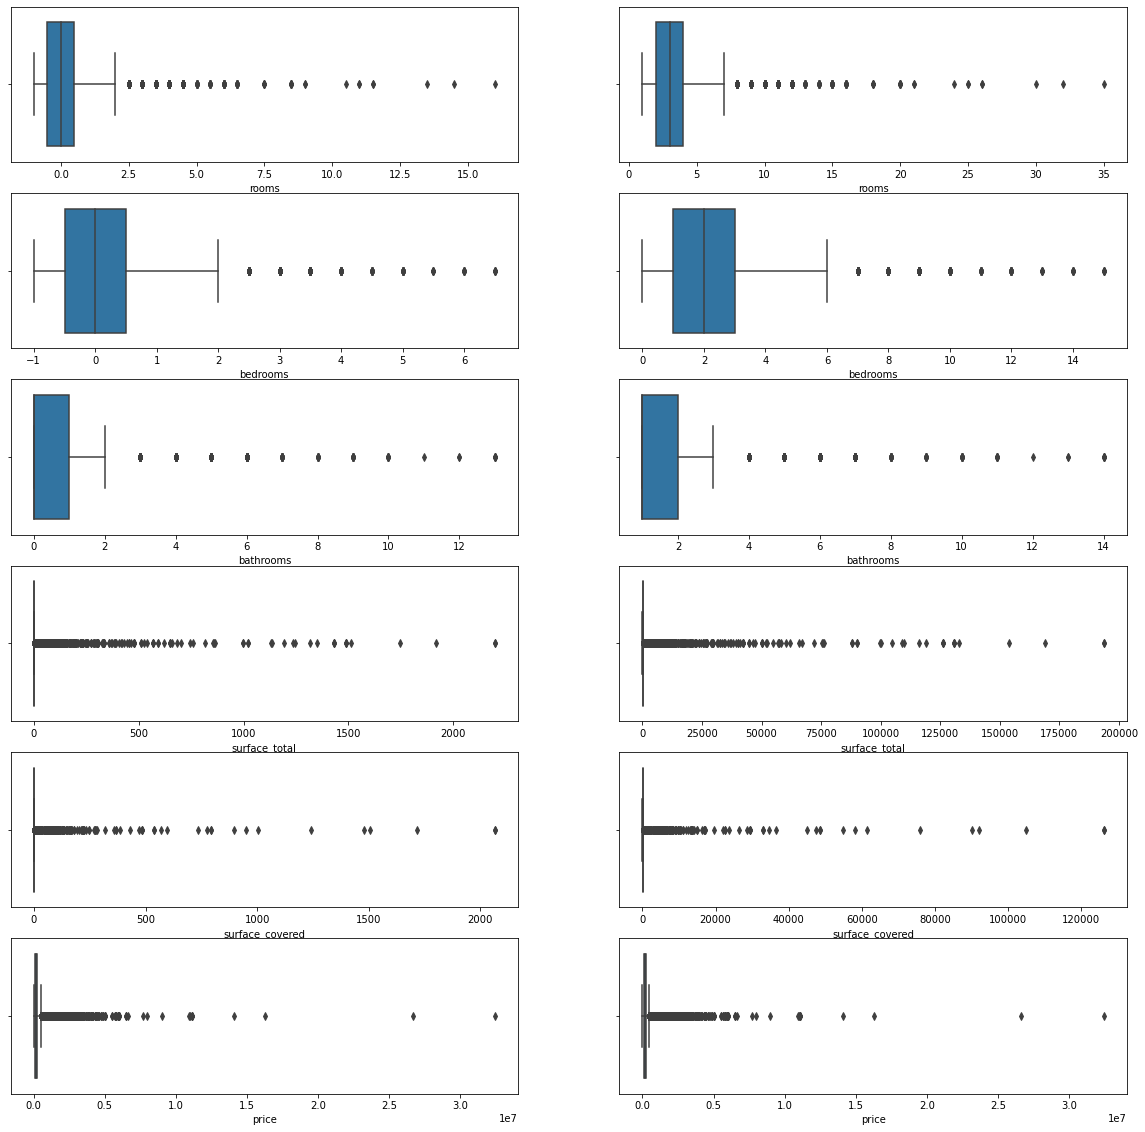

In [193]:
# En primer medida, se realizan dos series de boxplots a los fines de ver la variacion en los rangos previo y posterior al escalado de valores, 
# adicionalmente, se puede observar la presencia de los outliers correspondientes a cada columna.
fig, axes = plt.subplots(6,2, figsize=(20, 20))
sns.boxplot(data = properti_r, x = "rooms", ax=axes[0,0])
sns.boxplot(data = properti_r, x = "bedrooms", ax=axes[1,0])
sns.boxplot(data = properti_r, x = 'bathrooms', ax=axes[2,0])
sns.boxplot(data = properti_r, x = 'surface_total', ax=axes[3,0])
sns.boxplot(data = properti_r, x = 'surface_covered', ax=axes[4,0])
sns.boxplot(data = properti_r, x = 'price', ax=axes[5,0])
sns.boxplot(data = properti_1, x = "rooms", ax=axes[0,1])
sns.boxplot(data = properti_1, x = "bedrooms", ax=axes[1,1])
sns.boxplot(data = properti_1, x = 'bathrooms', ax=axes[2,1])
sns.boxplot(data = properti_1, x = 'surface_total', ax=axes[3,1])
sns.boxplot(data = properti_1, x = 'surface_covered', ax=axes[4,1])
sns.boxplot(data = properti_1, x = 'price', ax=axes[5,1])

Se realizan ambos grupos de boxplot a los fines de determinar, en una primera instancia, que el escalado se haya realizado de manera correcta, haciendo referencia a que presentan la misma distribucion y que no se observa modificacion/variacion entre los graficos de la izquierda y la derecha mas alla de la escala.

Para la limpieza de los valores atipicos, se realizara tratamiento por medio de IQR

In [194]:
#Procedemos a determinar minimo, maximo e IQR para las variables observadas e imprimimos los valores correspondientes
Q1 = properti_r.quantile(0.25)
Q3 = properti_r.quantile(0.75)
iqr = Q3 - Q1
minimo = Q1 - 1.5*iqr
maximo = Q3 + 1.5*iqr
print("Valor minimo: ", minimo)
print("Valor maximo: ", maximo)
print("IQR: ", iqr)

Valor minimo:  rooms                  -2.000000
bedrooms               -2.000000
bathrooms              -1.500000
surface_total          -1.795455
surface_covered        -1.844262
price             -120000.000000
dtype: float64
Valor maximo:  rooms                   2.000000
bedrooms                2.000000
bathrooms               2.500000
surface_total           2.204545
surface_covered         2.155738
price              496000.000000
dtype: float64
IQR:  rooms                   1.0
bedrooms                1.0
bathrooms               1.0
surface_total           1.0
surface_covered         1.0
price              154000.0
dtype: float64


In [195]:
# Realizamos el filtrado correspondiente de acuerdo a los valores obtenidos en el punto anterior.
properti_r_out = properti_r[~((properti_r < minimo) |(properti_r > maximo)).any(axis=1)] # Se establece un DF para continuar trabajando, el cual ya presenta escalado de datos y tratamiento de Outliers.
properti_r_out.shape

(122754, 8)

In [196]:
# Se procede a imprimir el "shape" de cada DF, posterior y previo al tratamiento de Outliers. Solo a fines informativos.
print(properti_r_out.shape)
print(properti_r.shape)

(122754, 8)
(146660, 8)


<AxesSubplot:xlabel='price'>

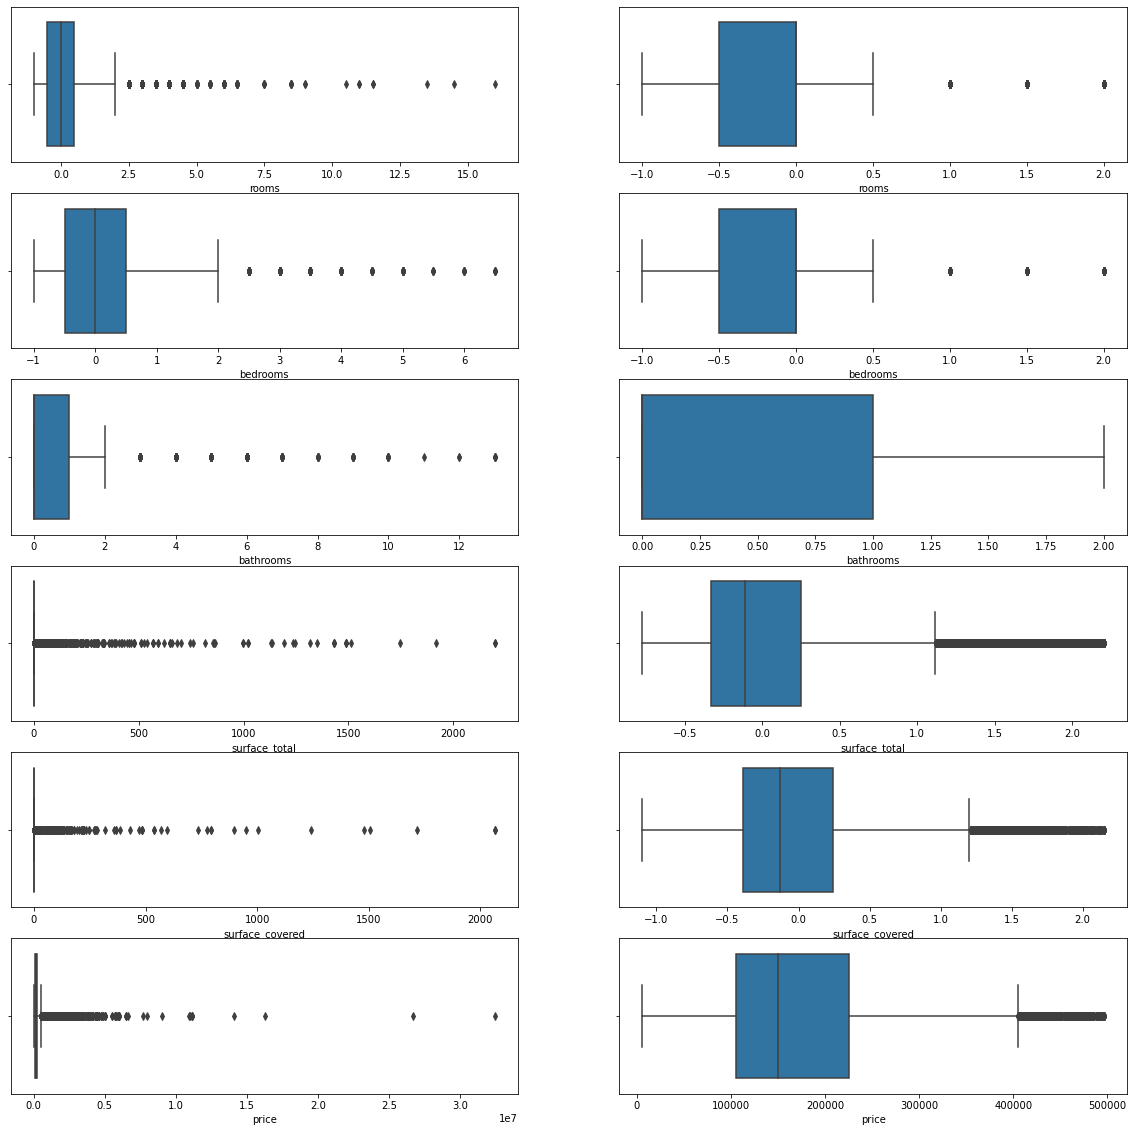

In [197]:
# Se realizan los boxplot correspondiente posterior al tratamiento de los datos.
fig, axes = plt.subplots(6,2, figsize=(20, 20))
sns.boxplot(data = properti_r, x = "rooms", ax=axes[0,0])
sns.boxplot(data = properti_r, x = "bedrooms", ax=axes[1,0])
sns.boxplot(data = properti_r, x = 'bathrooms', ax=axes[2,0])
sns.boxplot(data = properti_r, x = 'surface_total', ax=axes[3,0])
sns.boxplot(data = properti_r, x = 'surface_covered', ax=axes[4,0])
sns.boxplot(data = properti_r, x = 'price', ax=axes[5,0])
sns.boxplot(data = properti_r_out, x = "rooms", ax=axes[0,1])
sns.boxplot(data = properti_r_out, x = "bedrooms", ax=axes[1,1])
sns.boxplot(data = properti_r_out, x = 'bathrooms', ax=axes[2,1])
sns.boxplot(data = properti_r_out, x = 'surface_total', ax=axes[3,1])
sns.boxplot(data = properti_r_out, x = 'surface_covered', ax=axes[4,1])
sns.boxplot(data = properti_r_out, x = 'price', ax=axes[5,1])

Nuevamente se vuelven a generar los dos grupos de boxplots, en esta situacion a la izquierda se muestra el inicial escalado pero sin tratamiento de outliers, y a la derecha se realizan los graficos correspondientes al mismo DF posterior al tratamiento de Outliers. 
Se observa una reduccion importante de la escala utilizada en todos los boxplots, adicionalmente se puede observar con mayor claridad el tamaño de las respectivas cajas y sus cotas inferiores y superiores.

### Imputacion de valores faltantes

In [198]:
# Se determina la presencia de valores faltantes.
properti_r_out.isna().sum()

rooms                  0
bedrooms               0
bathrooms           4896
surface_total      18678
surface_covered    19072
property_type          0
barrio                 0
price                  0
dtype: int64

In [199]:
# Aplicamos la funcion "describe" para determinar las medidas aritmeticas correspondiente a los fines de tomarlas como control
properti_r_out.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,122754.000000,122754.000000,117858.000000,104076.000000,103682.000000,122754.000000
mean,-0.118338,-0.126762,0.383444,0.036550,0.000682,175478.747104
std,0.535238,0.470343,0.591819,0.518151,0.530966,93264.989239
min,-1.000000,-1.000000,0.000000,-0.772727,-1.098361,6000.000000
25%,-0.500000,-0.500000,0.000000,-0.329545,-0.393443,105000.000000
50%,0.000000,0.000000,0.000000,-0.113636,-0.131148,150300.500000
75%,0.000000,0.000000,1.000000,0.250000,0.245902,225000.000000
max,2.000000,2.000000,2.000000,2.204545,2.147541,496000.000000


In [200]:
# Se observan valores faltantes en 3 variables. A los fines de completarlas y, 
# atento a que se esta trabajando con un DF "sin" outliers, se procedera a completar con la media de las observaciones,
# situacion que es factible atento a que solo faltan valores "numericos"
properti_r_clean = properti_r_out.fillna(properti_r_out.mean())

In [201]:
# Aplicamos la misma funcion posterior a rellenar los valores faltantes. Se observa que el valor "mean" no se modifica y ya todas las variables presentan la misma cantidad de observaciones
properti_r_clean.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,122754.000000,122754.000000,122754.000000,122754.000000,122754.000000,122754.000000
mean,-0.118338,-0.126762,0.383444,0.036550,0.000682,175478.747104
std,0.535238,0.470343,0.579897,0.477105,0.487978,93264.989239
min,-1.000000,-1.000000,0.000000,-0.772727,-1.098361,6000.000000
25%,-0.500000,-0.500000,0.000000,-0.295455,-0.360656,105000.000000
50%,0.000000,0.000000,0.000000,-0.011364,-0.016393,150300.500000
75%,0.000000,0.000000,1.000000,0.147727,0.163934,225000.000000
max,2.000000,2.000000,2.000000,2.204545,2.147541,496000.000000


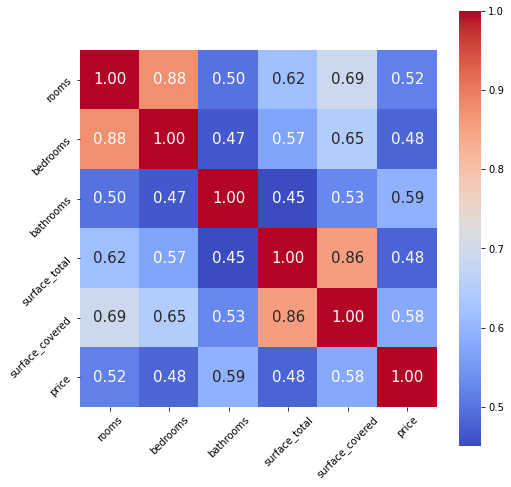

In [202]:
#Establecemos una matriz de correlaciones para determinar como se relacionan las variables en base al precio de las publicaciones
corr = properti_r_clean.drop(columns = ['property_type', 'barrio']).corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= properti_r_clean.drop(columns = ['property_type', 'barrio']).columns, 
           yticklabels= properti_r_clean.drop(columns = ['property_type', 'barrio']).columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

La matriz de correlacion muestra que con el Dataframe actual, la variable precio se encuentra relacionada en una escala similar con cada una de las variables contempladas, observandose una diferencia maxima de 0.11, mientras que en el DF del primer proyecto, la matriz presentaba una diferencia de 0.39 entre el valor de las variables que mejor y peor explicaban el precio.

In [203]:
# Establecemos el DF definitivo para continuar con el analisis. Trabajando tambien con aquellas propiedad de tipo "Departamento", "PH" y "Casa".
properti_final = properti_r_clean.loc[((properti_r_clean['property_type'] == 'Departamento') | (properti['property_type'] == 'PH') | (properti['property_type'] == 'Casa'))].copy()

### Arbol de Decision

In [204]:
# Se establece una variable que incorpore las columnas que decidan utilizarse para los valores de X o variables predictoras.
# En este momento, se trabaja sobre el DF con el preprocesamiento realizado en los puntos anterior.
values = ['surface_total']
X = properti_final[values]
y = properti_final['price']

In [205]:
#Se importan las librerias y funcionalidades correspondientes y se crean las variables de entrenamiento y prueba para los modelos
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [206]:
# Se establece y entrena el modelo de arboles de decisiones, iniciando el modelo con un max_depth de 3. Se establece tambien el valor del
# error cuadratico para dichos hiperparametros
reg_tree = DecisionTreeRegressor (max_depth = 3, random_state = 42)
reg_tree.fit(X_test, y_test)
y_pred = reg_tree.predict(X_test)
error_reg_tree = sqrt(mean_squared_error(y_test, y_pred))
print(error_reg_tree)

74627.42648614764


### Arbol de Decision proyecto 01

In [209]:
# Volvemos a cargar el DF properti_ml, el cual fue utilizado en el proyecto 01.
properti_ml = properti.loc[(properti['l2'] == 'Capital Federal') & ((properti['property_type'] == 'Departamento') | (properti['property_type'] == 'PH') | (properti['property_type'] == 'Casa'))]
properti_ml = properti_ml.loc[(properti_ml['surface_total'] <= 1000) & (properti_ml['surface_total'] >= 15) & (properti_ml['price'] <= 4000000)]
properti_ml = properti_ml[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]

properti_ml = properti_ml.dropna()
properti_ml_col = properti_ml.drop(['price'], axis = 1)
properti_price = properti_ml['price'] # Guardamos la columna precios (target) en una variable a los fines de no aplicarle el escalado.
col_names_1 = list(properti_ml_col.columns)
properti_ml.columns

Index(['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price'],
      dtype='object')

In [210]:
# A los fines de hacer comparable el valor observado en el criterio seleccionado para valuar el desempeño (sqrt), le aplicamos escalado de datos por medio de "Robust Scaler".
r_scaler = RobustScaler()
properti_ml_s = r_scaler.fit_transform(properti_ml_col)
properti_ml_s = pd.DataFrame(properti_ml_s, columns=col_names_1)

In [211]:
properti_price = properti_price.reset_index() # Reiniciamos el indice a los fines de poder incorporar la columna precios al DF escalado
properti_ml_s['price'] = properti_price['price']

In [212]:
properti_ml_s.isna().sum() # Verificamos que no haya valores NaN

rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
dtype: int64

In [213]:
# Se cargan los valores de X e Y y se realiza el split correspondiente.
# Se trabaja con la misma variable 'values' definida anteriormente, a los fines que ambos modelos tomen las mismas variables predictoras para X.
X_pro_1 = properti_ml_s[values]
y_pro_1 = properti_ml_s['price']
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_pro_1, y_pro_1, test_size = 0.3, random_state = 0)

In [214]:
# Se define y entrena el modelo y se determina el valor del error cuadratico medio. Se aplican los mismos hiperparametros para ambos Arboles de Decision.
reg_tree_1 = DecisionTreeRegressor (max_depth = 3, random_state = 42)
reg_tree_1.fit(X_test_1, y_test_1)
y_pred_1 = reg_tree_1.predict(X_test_1)
error_reg_tree_1 = sqrt(mean_squared_error(y_test_1, y_pred_1))
print(error_reg_tree_1)

210785.7888467009


### Conclusion Parte A
Al observar el resultado obtenido con el modelo del arbol de decision y basandonos en el criterio del error cuadratico, podemos confirmar que se evidencia una mejora en los resultados del modelo al aplicar criterios objetivos de preprocesamiento de datos, principalmente en lo referido a tratamiento de Outliers (1) y tratamiento de valores faltantes (2).

En el caso de los Outliers, para el primer proyecto se filtro el DF basandose en aquellas publicaciones que poseian un precio menor a $ 4.000.000,00 y la superficie total se encontraba entre 15 a 1.000 m2. En esta segunda instancia, el tratamiento de los valores atipicos se realizo por medio de la aplicacion del 1.5 +/- IQR a todas las columnas de valores numericos y que se consideraron pertinentes para el modelo.

En el caso de los valores faltantes, en el primer proyecto se procedio a eliminar aquellas filas que poseian valores nulos o NaN, mientras que en la segunda situacion, se procedio a completar dichas ausencias con el promedio de todas las observaciones de la columna correspondiente previo a haber filtrado los Outliers.

Respecto al escalado de datos, atento a que para ambos modelos se aplico el mismo criterio, no podemos establecer si es factor de mejora sustancial para los resultados obtenidos en ambos modelos.


##### Paso adicional
Previo a comenzar con el analisis de modelos avanzados, se procede a crear variables Dummy para el "property_type" a los fines de poder incluir a dicha variable en los parametros de decision del modelo

In [215]:
# Establecemos la variable Dummy para el tipo de propiedad
dummy_property = pd.get_dummies(properti_final["property_type"], prefix = "tipo")

In [216]:
# En el DF, borramos la columna de "property_type"
properti_final = properti_final.drop(["property_type"], axis = 1)

In [217]:
# Concatenamos al DF, la variable dummy establecida para el tipo de propiedad
properti_final = pd.concat([properti_final, dummy_property], axis = 1)

### Parte B - Modelos Avanzados

##### En primer medida, se establecen las variables X e Y y se realiza el split correspondiente a los fines de utilizar los mismos valores para todos los modelos

In [218]:
# Se procede a crear las variables X e Y para los modelos a implementar, y posteriormente se realiza el split en variables de prueba y entrenamiento.
X_mod_a = properti_final.drop(['barrio', 'price'], axis=1)
y_mod_a = properti_final['price']
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_mod_a, y_mod_a, test_size = 0.3, random_state = 0)

#### Primer Modelo. SVR

Se procede a crear y entrenar modelos de SVR variando el hiperparametro "Kernel". 

In [219]:
# Se importa el modelo a utilizar y se crea, entrena y calcula el error cuadratico para un kernel linear.
from sklearn.svm import SVR
mod_svr = SVR(kernel='linear')
mod_svr.fit(X_train_a, y_train_a)
y_pred = mod_svr.predict(X_test_a)
error_mod_svr = sqrt(mean_squared_error(y_test_a, y_pred))

In [220]:
# Se crea, entrena y calcula el error cuadratico para un kernel poly
mod_svr_p = SVR(kernel= 'poly')
mod_svr_p.fit(X_train_a, y_train_a)
y_pred_p = mod_svr_p.predict(X_test_a)
error_mod_svr_p = sqrt(mean_squared_error(y_test_a, y_pred_p))

In [221]:
# Se crea, entrena y calcula el error cuadratico para un kernel rbf
mod_svr_r = SVR(kernel = 'rbf')
mod_svr_r.fit(X_train_a, y_train_a)
y_pred_r = mod_svr_r.predict(X_test_a)
error_mod_svr_r = sqrt(mean_squared_error(y_test_a, y_pred_r))

In [222]:
# Se crea, entrena y calcula el error cuadratico para un kernel sigmoid
mod_svr_s = SVR(kernel = 'sigmoid')
mod_svr_s.fit(X_train_a, y_train_a)
y_pred_s = mod_svr_s.predict(X_test_a)
error_mod_svr_s = sqrt(mean_squared_error(y_test_a, y_pred_s))

In [223]:
# Definimos una funcion para definir cual es el modelo SVR con menor SQRT, la funcion trabaja indistintamente cuales sean los valores y variables utilizadas en X.
# El objetivo es utilizar como punto de comparacion aquella "version" que posea el mejor resultado a los fines de compararlo con el segundo modelo a implementar.
def mejor_resultado (error_mod_svr, error_mod_svr_p, error_mod_svr_r, error_mod_svr_s):
    mejor = 0
    kernel = ""
    if error_mod_svr < error_mod_svr_p and error_mod_svr < error_mod_svr_r and error_mod_svr < error_mod_svr_s:
        mejor = error_mod_svr
        kernel = "linear"
    elif error_mod_svr_p < error_mod_svr_r and error_mod_svr_p < error_mod_svr_s:
        mejor = error_mod_svr_p
        kernel = "poly"
    elif error_mod_svr_r < error_mod_svr_s:
        kernel = "rbf"
        mejor = error_mod_svr_r
    else:
        kernel = "sigmoid"
        mejor = error_mod_svr_s
    print("El mejor resultado se obtuvo para un kernel:", kernel, " con un valor de:", mejor)

In [224]:
# Se aplica la formula anterior para determinar el kernel que obtuvo mejor resultado.
mejor_resultado(error_mod_svr, error_mod_svr_p, error_mod_svr_r, error_mod_svr_s)

El mejor resultado se obtuvo para un kernel: linear  con un valor de: 79119.19306831023


#### Segundo Modelo. Random Forest con GridSearch

In [225]:
# Importamos la libreria a utilizar y generamos el modelo correspondiente
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
forest_model.fit(X_train_a, y_train_a) # Se aplica el fit correspondiente para utilizarlo mas adelante para ver la importancia de los features en el modelo

RandomForestRegressor()

In [226]:
# Importamos la libreria de GridSearchCV para utilizarla con el fin de optimizar los hiperparametros.
from sklearn.model_selection import GridSearchCV

In [227]:
# Definimos el param_grid para utilizar en el Grid Search
param_grid = {'n_estimators': [100, 250, 500, 750, 1000],
              'random_state': [0, 35, 42, 49],
              'criterion': ['mse'],
              'max_depth':[10, 15, 20]}              

#### Eleccion de hiperparametros a utilizar.

n_estimators: the number of trees in the forest. El valor por defecto es 100, motivo por el cual se considero oportuno tomarlo como cota inferior y aumentarlo 10 veces para establecer el limite maximo. El rango se aplica tomando el limite superior y aplicandole cuartos.

random_state: los valores mas populares para trabajar son el 0 y el 42 (ambos considerados en el rango), sobre este ultimo se aplica un +/- 7 para determinar la cota superior y un valor adicional.

criterion: la funcion para medir la calidad de una division. En este caso se trabajo unicamente con 'mse' (mean squared error) y se deja de lado el calculo sobre 'mae' (mean absolute error).

max_depth: profundidad maxima del arbol. Se toman tres valores a los fines de limitar la profundidad del arbol, atento a que al no pasar ningun valor, el proceso continua hasta que todas las "hojas" del arbol son puras.

In [228]:
# Creamos el modelo del GridSearch y lo asignamos a la variable grid_model
grid_model = GridSearchCV(forest_model, param_grid=param_grid, cv=2, n_jobs = 2)

In [229]:
# Aplicamos la funcion fit al grid_model. DEMANDA TIEMPO DE EJECUCION
grid_model.fit(X_train_a, y_train_a)

GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=2,
             param_grid={'criterion': ['mse'], 'max_depth': [10, 15, 20],
                         'n_estimators': [100, 250, 500, 750, 1000],
                         'random_state': [0, 35, 42, 49]})

In [230]:
# Cargamos los valores predichos por el modelo tomando los mejores parametros obtenidos
y_predict = grid_model.predict(X_test_a)
# Determinamos el error cuadradito de dicho modelo
error_grid = sqrt(mean_squared_error(y_test_a, y_predict))
# Imprimimos el resultado de criterio obtenido
print(error_grid)

53273.96667802385


In [231]:
# A fines informativos, imprimimos los mejores parametros obtenidos por el modelo
print("Mejores parametros: "+str(grid_model.best_params_))

Mejores parametros: {'criterion': 'mse', 'max_depth': 15, 'n_estimators': 1000, 'random_state': 42}


C:\Users\Pablo\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pablo\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


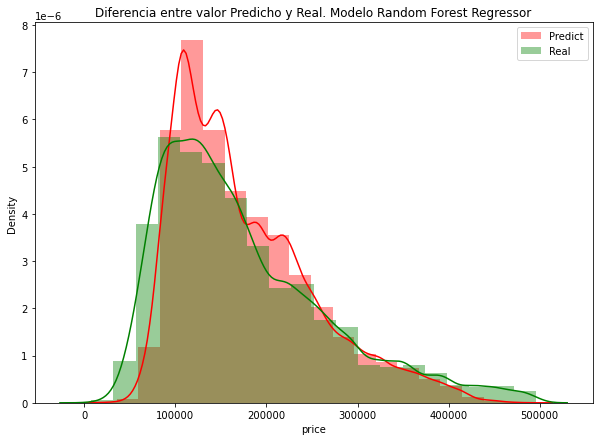

In [246]:
plt.figure(figsize = (10,7))
plt.title("Diferencia entre valor Predicho y Real. Modelo Random Forest Regressor")
sns.distplot(y_predict, bins = 20, color = 'r', label = 'Predict')
sns.distplot(y_test_a, bins = 20, color = 'g', label = 'Real')
plt.legend();

En el grafico anterior se trabajo con los valores obtenidos y aplicados sobre el modelo de Random Forest Regressor. En terminos generales, se observa a simple vista, que el modelo predice bastante bien los precios de las propiedades, situacion que mejoro respecto al modelo de Arbol de Decision desarrollado en el proyecto 01. Adicionalmente, se observan dos diferencias importantes:

* 1- El modelo subestima los precios, cuando los mismos se encuentran en las colas de la distribucion, es decir, para aquellos valores bajos y altos.
* 2- En contraposicion a lo anterior, el modelo sobreestima los precios para aquellos valores que se encuentran mas centrados en la distribucion de valores reales.

Si bien se esperaba que se encuentren ciertos errores o diferencias en las predicciones o funcionamiento, llama la atencion en primera medida, que los errores presenten un patron como el contemplado en los puntos 1 y 2.

C:\Users\Pablo\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pablo\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


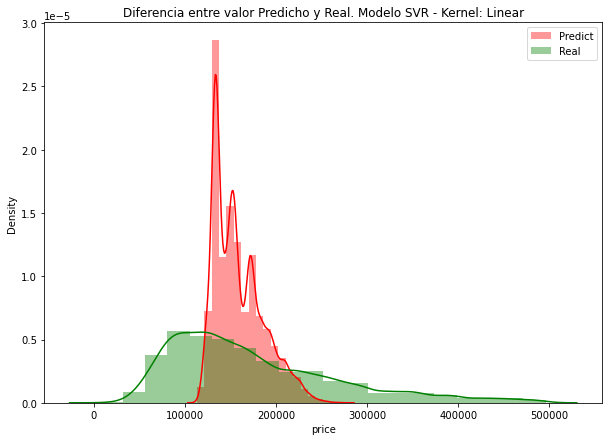

In [248]:
plt.figure(figsize = (10,7))
plt.title("Diferencia entre valor Predicho y Real. Modelo SVR - Kernel: Linear")
sns.distplot(y_pred, bins = 20, color = 'r', label = 'Predict')
sns.distplot(y_test_a, bins = 20, color = 'g', label = 'Real')
plt.legend();

A los fines de poder comparar, se trabaja adicionalmente con los valores obtenidos (predicho y de test) para el modelo de SVR con un kernel linear. En este caso, se observa la misma situacion que en el grafico anterior, pero todavia mas marcada, justificando este aspecto la diferencia que se observo en los valores obtenidos para el Mean Squared Error.

In [249]:
# Se establece una variable que contenga la diferencia entre los valores reales y los predichos por el modelo con mejor resultado.
error_forest = y_test_a - y_predict

Text(0.5, 1.0, 'Distribucion de la diferencia de errores')

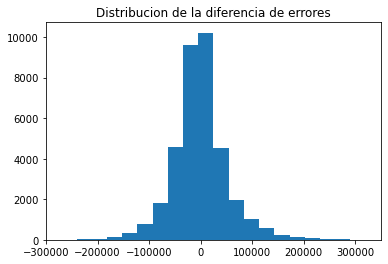

In [254]:
# Se establece un histograma con 20 agrupaciones en base a la variable definida anteriormente.
plt.hist(error_forest, bins = 20)
plt.title("Distribucion de la diferencia de errores")


El histograma realizado, nos sirve como un medio adicional para establecer que el modelo presenta un buen resultado para predecir los precios de las propiedades. En el grafico se observa una distribucion normal bien marcada, con una granconcentracion de valores en torno al 0 (la prediccion coincidiria con el valor real) y una disminucion bien brusca al alejarnos de dicho centro, indicando que son pocas las observaciones que presentan diferencias.

#### Conclusiones Parte B - Modelos Avanzados
Llegado a este punto nos encontramos en presencia de 4 modelos (2 de ellos diferenciados por los datos utilizados para entrenarlos) con resultados similares en su mayoria. Todos trabajados en base a un escalado de datos por medio del "Robust Scaler" a los fines de poseer resultados comparables.

Respecto a la diferencia encontrada en los resultados obtenidos con los arboles de decision, ya se plantearon las conclusiones en el apartado correspondiente, en este aspecto se procedera a analizar los resultados obtenidos de los modelos entrenados bajo el nuevo preprocesado de datos.

Los siguientes modelos fueron entrenados:

- Decission Tree Regressor, con un sqrt: 74627.42648614764
- SVR (variando el kernel), siendo el de mejor resultado el que poseia kernel "linear", con un sqrt: 79119.19306831023
- Random Forest Regressor con un sqrt de: 53273.96667802385

De acuerdo a los valores obtenidos, el modelo que mejor predice el precio de las propiedades es el Random Forest Regressor, cuyos hiperparametros fueron optimizados por medio de GridSearchCV. Recordemos que al trabajar con error cuadratico medio, el objetivo es que el modelo presente el menor valor posible en dicho criterio, siendo preferente un sqrt de 53.273,96 sobre 74.627,42 y 79.119,19.

### Parte C - Interpretacion de Modelos

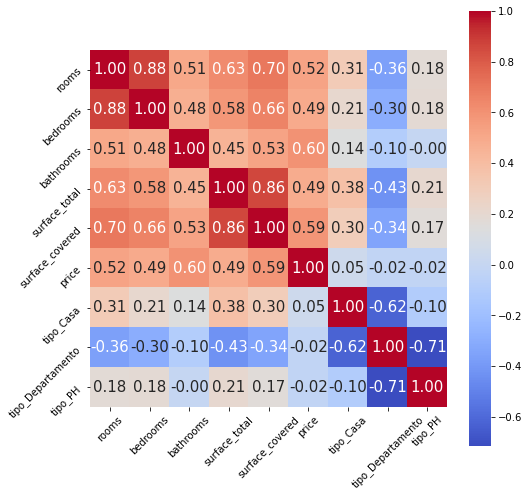

In [233]:
# A los fines de determinar las variables mas relevantes, se procede a aplicar una matriz de correlaciones en base al DF utilizado para generar y entrenar los modelos correspondientes.
corr = properti_final.drop(columns = 'barrio').corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= properti_final.drop(columns = 'barrio').columns, 
           yticklabels= properti_final.drop(columns = 'barrio').columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

Al observar los resultados obtenidos por la matriz de correlacion, se observa que la variable Dummy para los tipos de propiedad presenta una relacion muy baja (casi nula) al momento de predecir el precio de una propiedad, siendo las mas relevantes aquellas relacionadas con la distribucion de espacios y tamaño disponible y ocupado.

En este aspecto, esperaba que las variables relacionadas al tipo de propiedad tengan una participacion mayor, pero es logico el resultado obtenido atento a que es razonable considerar que el precio va a estar mas relacionado, como se menciono anteriormente, con la distribucion de sus ambientes y el tamaño mas que con el "tipo" de propiedad de que se trate.

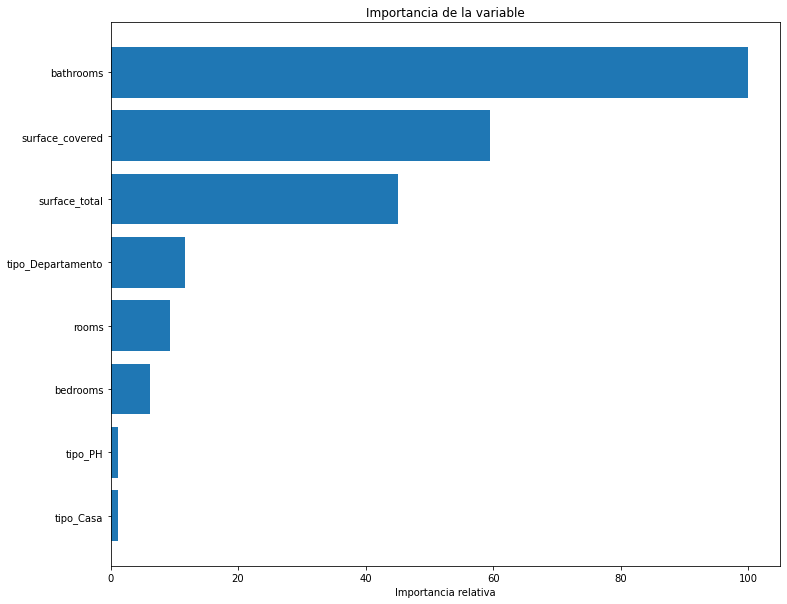

In [234]:
# Establecemos e imprimimos la importancia relativa de los features del modelo de Random Forest.
feature_importance = forest_model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train_a.columns[sorted_idx])
plt.xlabel('Importancia relativa')
plt.title('Importancia de la variable')
plt.show()

En el grafico anterior se puede observar la importancia que da el modelo de RandomForestRegressor a cada uno de los features al momento de aplicar el fit correspondiente. En este aspecto se observa una diferencia en relacion a la matriz de correlaciones, a saber:

- La matriz otorga una relevancia o relacion similar a las variables "Bathrooms", "surface_covered", "surface_total", "rooms" y "bedrooms" como explicativas del precio.
- El modelo entrenado, le otorga mayor relevancia a la variable "Bathrooms", "surface_covered" y "surface_total", dejando de lado las otras cinco variables tomadas para el valor X.

Mas alla de los resultados abordados en este punto, no se presenta un cambio en lo especificado en el parrafo anterior respecto a la participacion relativa del tipo de propiedad en la prediccion del valor.

### Conclusion

#### Preprocesamiento

A lo largo del presente proyecto se expone el hecho de que un buen preprocesamiento de datos, principalmente en lo relacionado a outliers y valores faltantes, genera una mejora significativa que no puede ser pasada por alto al momento de analizar y/o implementar un modelo, esta situacion se evidencia en el hecho de que el mismo modelo (Decision Tree) trabajado con los mismos hiperparametros y con el mismo DF pero con un tratamiento distinto, se obtuvieron los siguientes resultados:

- Modelo con DF "con" preprocesamiento de Outliers y Valores faltantes: 74627.42648614764
- Modelo con DF "sin" preprocesamiento de Outliers y Valores faltantes: 210785.7888467009

Situacion que representa una mejora de aproximadamente un 65% en el resultado obtenido, recordando que con el criterio de SQRT, siempre buscamos el menor valor.

#### Modelos
Si bien los resultados obtenidos son satisfactorios si consideramos la mejora que se evidencia en el funcionamiento de los modelos al aplicar mejores criterios y modelos avanzados para predecir el precio de una vivienda, es importante considerar y no pasar por alto el hecho de que se presenta una limitacion en la cantidad de hiperparametros utilizados principalmente asociado a los tiempos de procesamiento y entrenamiento de los distintos modelos que se fueron realizando, situacion que deja lugar a dudas para poder indagar o arribar a mejores conclusiones si se puediese modificar una cantidad relevante de hiperparametros para cada uno de los modelos de manera individual.

### Desafio Opcional

A los fines de analizar los clusters que se presentan, se toma como referencia las features determinadas por nivel de importancia para el modelo con mejores resultados, dejando de lado "bathrooms" al corresponderse a numeros enteros.

In [235]:
# Se crea el DF correspondiente para trabajar
properti_cluster = properti_final.copy()
properti_cluster['property_type'] = properti_1['property_type']
properti_cluster['barrio'] = properti_1['l3']

In [236]:
# Se importa la libreria a utilizar
from sklearn.cluster import KMeans

<AxesSubplot:xlabel='surface_total', ylabel='price'>

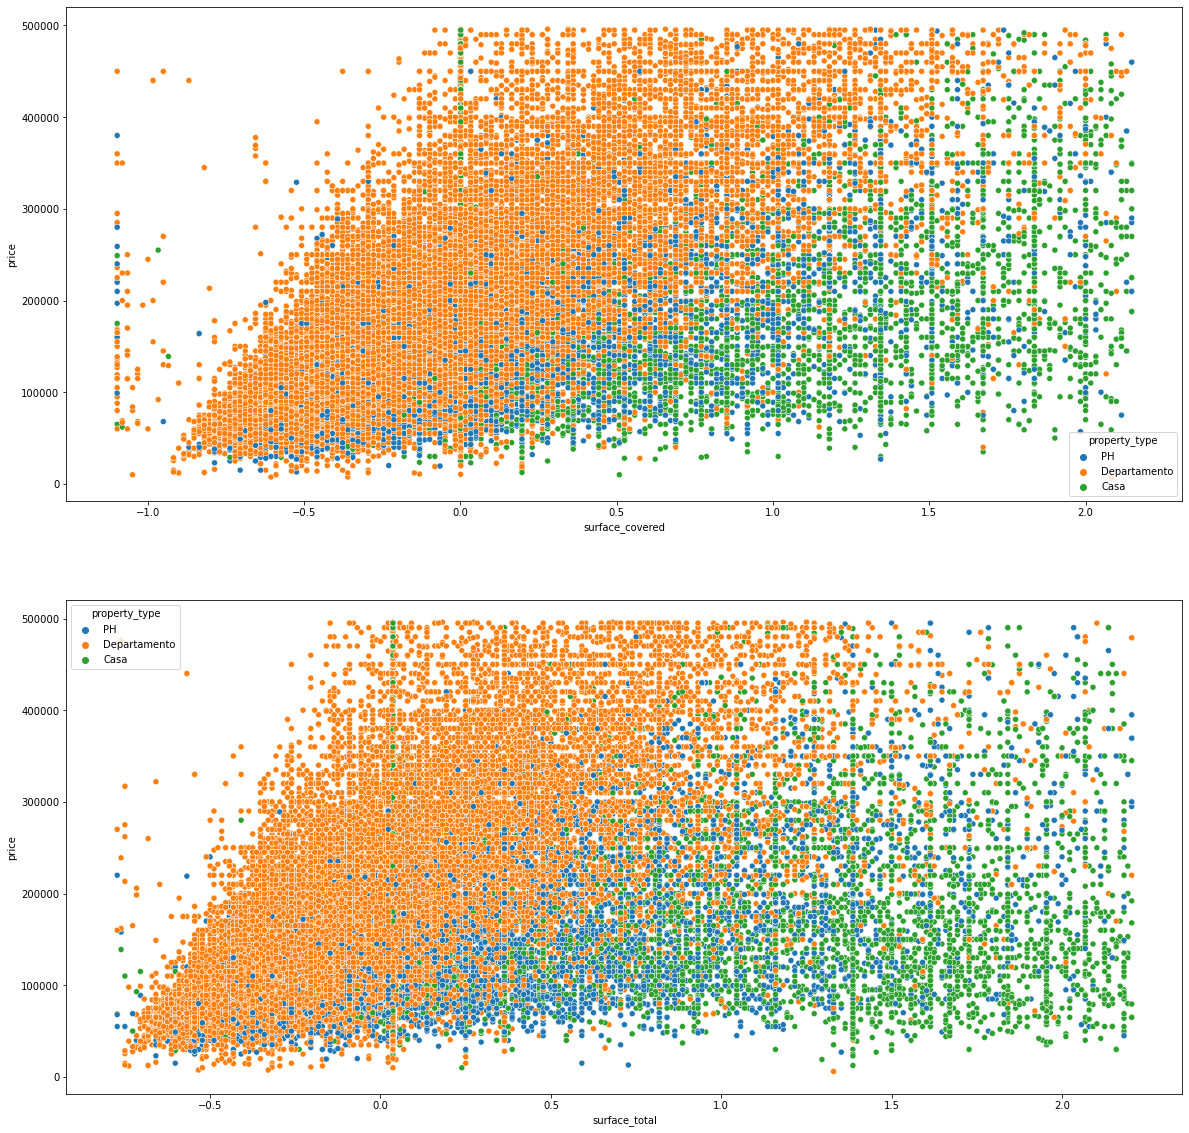

In [237]:
# Se procede a realizar un scatterplot para ver la relacion segun precio y superficie (total y cubierta) desagregado por tipo de propiedad
fig, axes = plt.subplots(2,1, figsize=(20, 20))
sns.scatterplot(x= "surface_covered", y="price", hue = 'property_type', data=properti_cluster, ax=axes[0])
sns.scatterplot(x= "surface_total", y="price", hue = 'property_type', data=properti_cluster, ax=axes[1])

En ambos graficos se observa una clara tendencia, el tipo de propiedad "departamento", presenta un mayor precio a medida que aumenta tanto la superficie cubierta como la total.

In [238]:
# Se establecen las features a considerar para el cluster
X_op_cov = properti_cluster[['surface_covered', 'price']]
X_op_cov = X_op_cov.values

C:\Users\Pablo\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Pablo\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


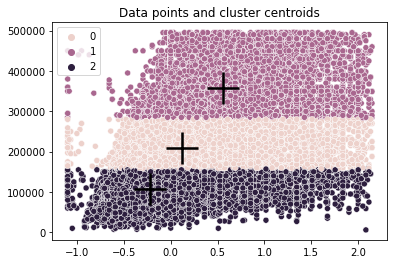

In [239]:
# Defino y entreno el modelo
km = KMeans(n_clusters=3)
km = km.fit(X_op_cov)
# Obtengo la posición de los centros y las etiquetas
etiquetas_ = km.labels_
centros_ = km.cluster_centers_
# Plotting the cluster centers and the data points on a 2D plane
sns.scatterplot(X_op_cov[:, 0], X_op_cov[:, -1], hue = etiquetas_)
sns.scatterplot(centros_[:, 0], centros_[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

In [240]:
# Se establecen las features a considerar para el cluster
X_op_tot = properti_cluster[['surface_total', 'price']]
X_op_tot = X_op_tot.values

C:\Users\Pablo\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Pablo\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


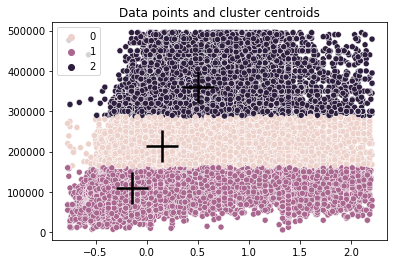

In [241]:
# Defino y entreno el modelo
km_1 = KMeans(n_clusters=3)
km_1 = km_1.fit(X_op_tot)
# Obtengo la posición de los centros y las etiquetas
etiquetas_1 = km_1.labels_
centros_1 = km_1.cluster_centers_
# Plotting the cluster centers and the data points on a 2D plane
sns.scatterplot(X_op_tot[:, 0], X_op_tot[:, -1], hue = etiquetas_1)
sns.scatterplot(centros_1[:, 0], centros_1[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

En ambas situaciones, se presenta una distribucion de clusters desigular si las comparamos entre si. 

En el primer grafico, se observan 3 clusters (se toma dicho valor por los tipos de propiedad considerados) en el cual se puede estimar que la variable precio presenta un peso mayor al momento de realizar los clusters. Donde la division entre cluster se presenta como rectas tendiendtes a una orientacion horizontal y no existe punto en el cual los 3 clusters tengan contacto.

En el segundo caso, se puede observar en primera medida que los clusters no se encuentran separados de manera "lineal" como en el primer grafico y, en segunda medida, la distribucion se asemeja mas al scatterplot realizado al considerar la relacion entre el precio y la superficie total, pudiendo asimilar o relacionar el grupo 2 al tipo de propiedad "departamentos" siendo aquellos que presentan el mayor incremento de precio ante cambios en la superficie total. El cluster 1 con las "casas", siendo su evolucion de precio mas constante respecto al aumento en la superficie, y el grupo 0 siendo un conjunto de distintas propiedades sin poder determinar un tipo en puntual.